# Computational Tools for Geographic Data Science, Part1

## Around Jupyter Notebook

The jupyter notebook is an excellent interactive platform to work with python, let's do some display around with IPython

In [1]:
from IPython.display import Image

In [2]:
url = ("https://upload.wikimedia.org/wikipedia/"\
       "commons/c/ca/Medicean_Stars.png")

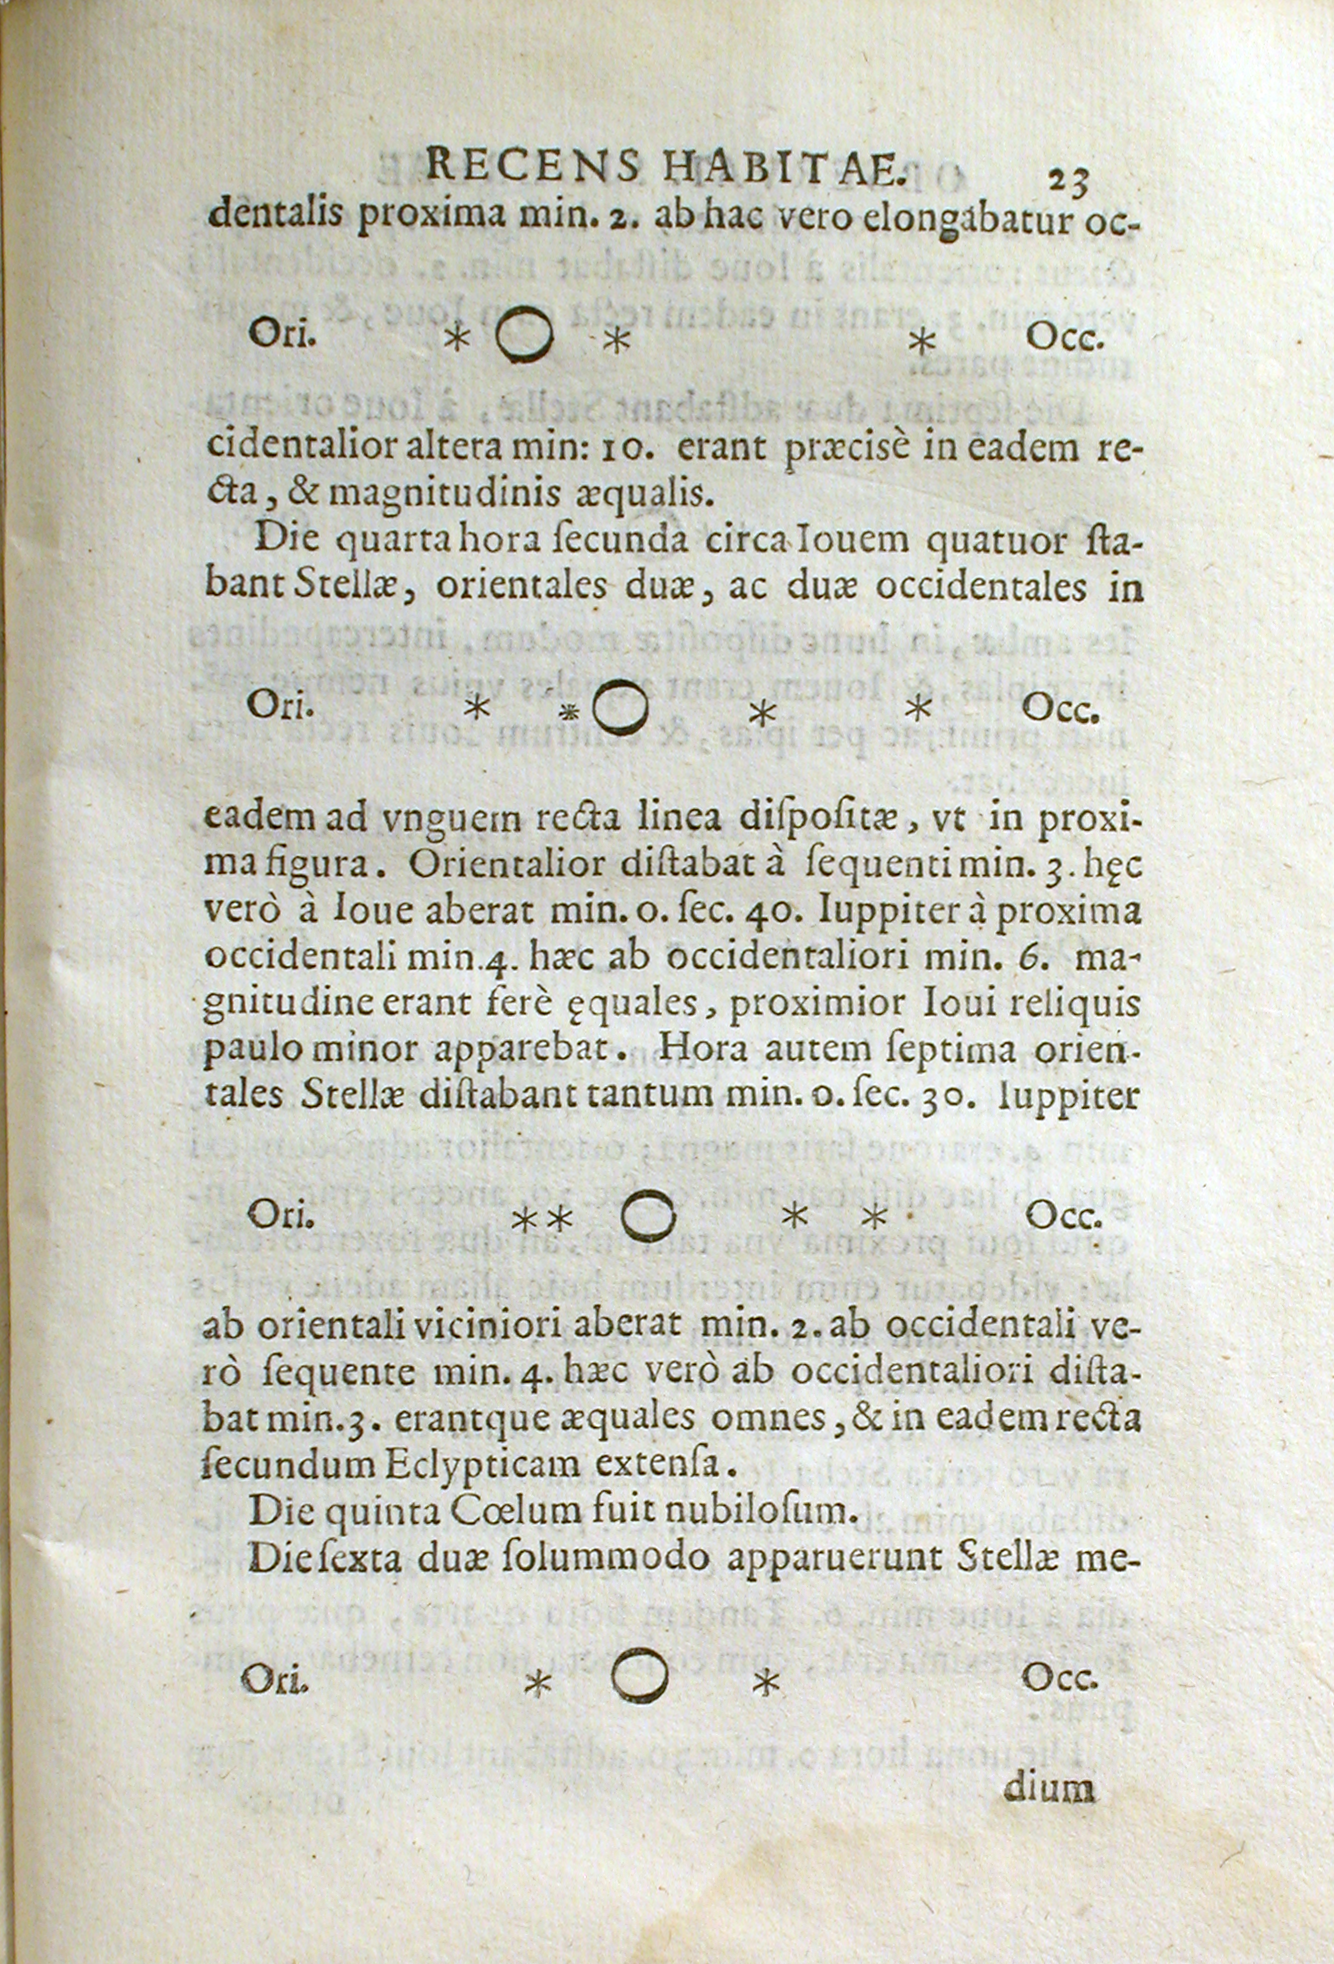

In [3]:
Image(url)

In [1]:
import IPython.display as display

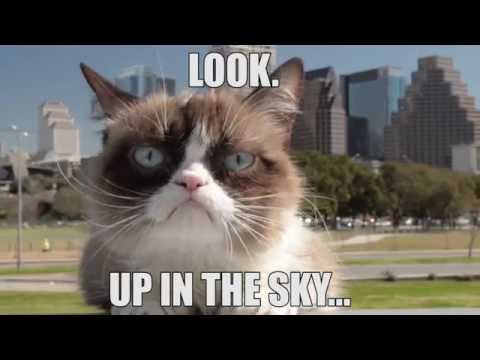

In [2]:
display.YouTubeVideo('iinQDhsdE9s')

In [3]:
# standard HTML code:
display.HTML("""<table>
<tr>
<th>Header 1</th>
<th>Header 2</th>
</tr>
<tr>
<td>row 1, cell 1</td>
<td>row 1, cell 2</td>
</tr>
<tr>
<td>row 2, cell 1</td>
<td>row 2, cell 2</td>
</tr>
</table>""")

In [136]:
# we can embed interactive maps with an iframe: Showing District of Malika in Senegal where my parents lives

osm = """
<iframe width="425" height="350" frameborder="0" scrolling="no" marginheight="0" marginwidth="0" src="https://www.openstreetmap.org/export/embed.html?bbox=-17.35510979339093%2C14.788339774199699%2C-17.33390961333722%2C14.807509057603031&amp;layer=mapnik" style="border: 1px solid black"></iframe><br/><small><a href="https://www.openstreetmap.org/#map=15/14.7979/-17.3445">View Larger Map</a></small>
"""
display.HTML(osm)

Let's visualize the above figure in a better look, i've took a satelite image from google earth pro in the same area

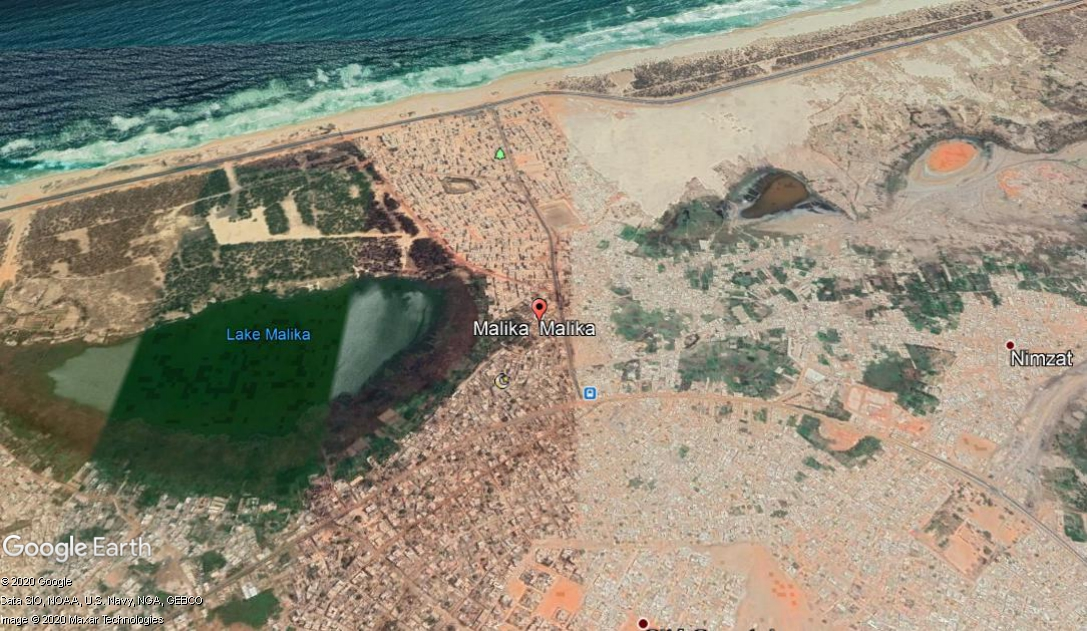

In [9]:
# using a similar approach, we can also load and display local images, which we will so throughout the book. For that, we use the Image method:

path = ("D:\Research\PROJECT\pyexeriences\Geospatial experiences\Raster data analysis\data\malika.jpg")
display.Image(path)

## Spatial Data Processing

We will see the airport in the world, the data source of our dataset is 'https://hub.arcgis.com/datasets/schools-BE::world-airports'

In [11]:
import geopandas as gpd
url = 'https://opendata.arcgis.com/datasets/acf19fecd4dd4688913ffcba14548eda_0.geojson'
world_airport = gpd.read_file(url)

In [12]:
world_airport.head()

OBJECTID_1    id ident            type                           name  \
0           1   3.0  AGGH  medium_airport  Honiara International Airport   
1           2   4.0  AGGM  medium_airport                  Munda Airport   
2           3   8.0  ANYN  medium_airport    Nauru International Airport   
3           4  53.0  AYBK  medium_airport                   Buka Airport   
4           5  55.0  AYDU  medium_airport                   Daru Airport   

   latitude_deg  longitude_deg  elevation_ft continent iso_country  ...  \
0     -9.428000     160.054993          28.0        OC          SB  ...   
1     -8.327970     157.263000          10.0        OC          SB  ...   
2     -0.547458     166.919006          22.0        OC          NR  ...   
3     -5.422320     154.673004          11.0        OC          PG  ...   
4     -9.086760     143.207993          20.0        OC          PG  ...   

  he_latitude_deg he_longitude_deg he_elevation_ft he_heading_degT  \
0       -9.424260          160.064              14             248   
1       -8.326760          157.269               9             259   
2       -0.553739          166.926              20             310   
3       -5.417510          154.678               9             228   
4       -9.091220          143.212              19             315   

  he_displaced_threshold_ft ObjectID type_1   description frequency_mhz  \
0                      None  10420.0   AFIS          INFO         118.1   
1                      None  10425.0   AFIS          INFO         118.1   
2                       380  10647.0    A/G           FIC         118.1   
3                      None  11286.0    RDO       LAE RDO         127.1   
4                      None  11298.0    FSS  MORESBY CNTR         124.9   

                               geometry  
0  POINT Z (160.05499 -9.42800 0.00000)  
1  POINT Z (157.26300 -8.32797 0.00000)  
2  POINT Z (166.91901 -0.54746 0.00000)  
3  POINT Z (154.67300 -5.42232 0.00000)  
4  POINT Z (143.20799 -9.08676 0.00000)  

[5 rows x 44 columns]

In [13]:
world_airport.columns

Index(['OBJECTID_1', 'id', 'ident', 'type', 'name', 'latitude_deg',
       'longitude_deg', 'elevation_ft', 'continent', 'iso_country',
       'iso_region', 'municipality', 'scheduled_service', 'gps_code',
       'iata_code', 'local_code', 'home_link', 'wikipedia_link', 'keywords',
       'id_1', 'airport_ref', 'airport_ident', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_latitude_deg',
       'le_longitude_deg', 'le_elevation_ft', 'le_heading_degT',
       'le_displaced_threshold_ft', 'he_ident', 'he_latitude_deg',
       'he_longitude_deg', 'he_elevation_ft', 'he_heading_degT',
       'he_displaced_threshold_ft', 'ObjectID', 'type_1', 'description',
       'frequency_mhz', 'geometry'],
      dtype='object')

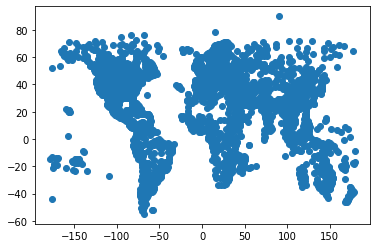

In [14]:
# Plot XY coordinates
import matplotlib.pyplot as plt
plt.scatter(world_airport.longitude_deg, world_airport.latitude_deg)

In [16]:
import contextily as ctx
# Download tiles for the bounding box of the airport's GeoDataFrame
%time img, ext = ctx.bounds2img(*world_airport.total_bounds, 2)

Wall time: 2.2 s


In [17]:
ext

(-10018754.171394622,
 10018754.171394622,
 -10018754.171394624,
 10018754.171394626)

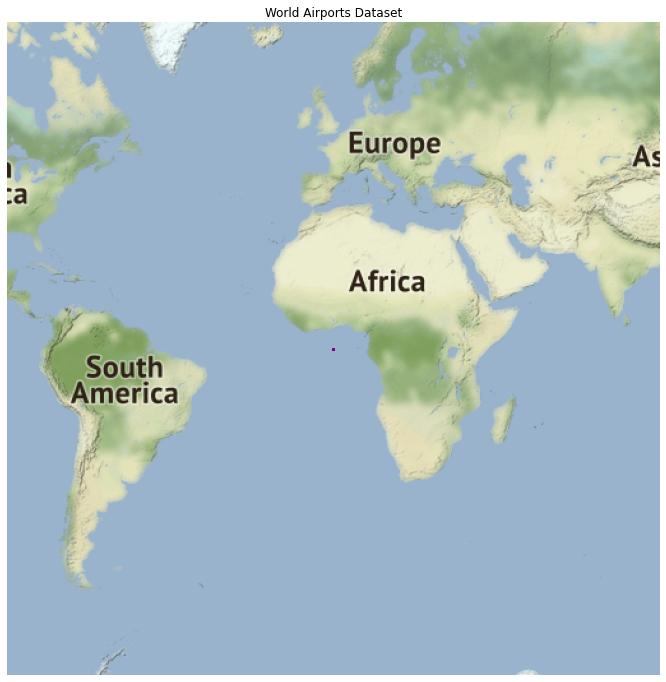

In [22]:
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(20, 12))
# Display tile map
ax.imshow(img, extent=ext)
# Display airports on top
ax.scatter(world_airport.longitude_deg, world_airport.latitude_deg, c='purple', s=2)
# Remove axis
ax.set_axis_off()
# Add title
ax.set_title('World Airports Dataset')
# Display
plt.show()

In [24]:
# Another method to map airport into the world map
alalm = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # alalam means world in Arabic

In [44]:
alalm.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [45]:
alalm.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

<AxesSubplot:>

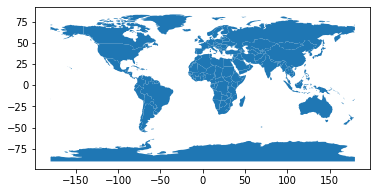

In [25]:
alalm.plot()

<AxesSubplot:>

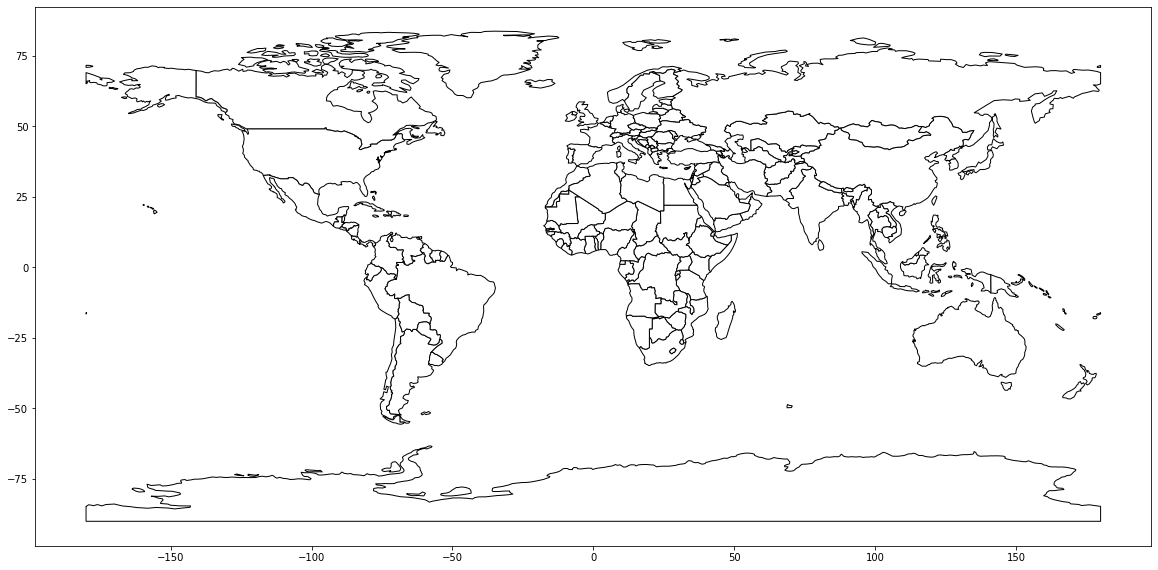

In [26]:
alalm.plot(figsize=(20, 12), color = 'white', edgecolor='black')

In [27]:
# Checking the crs
print(world_airport.crs);
print(alalm.crs)

epsg:4326
epsg:4326


Excellent, seems both dataset has the same coordinate reference system.

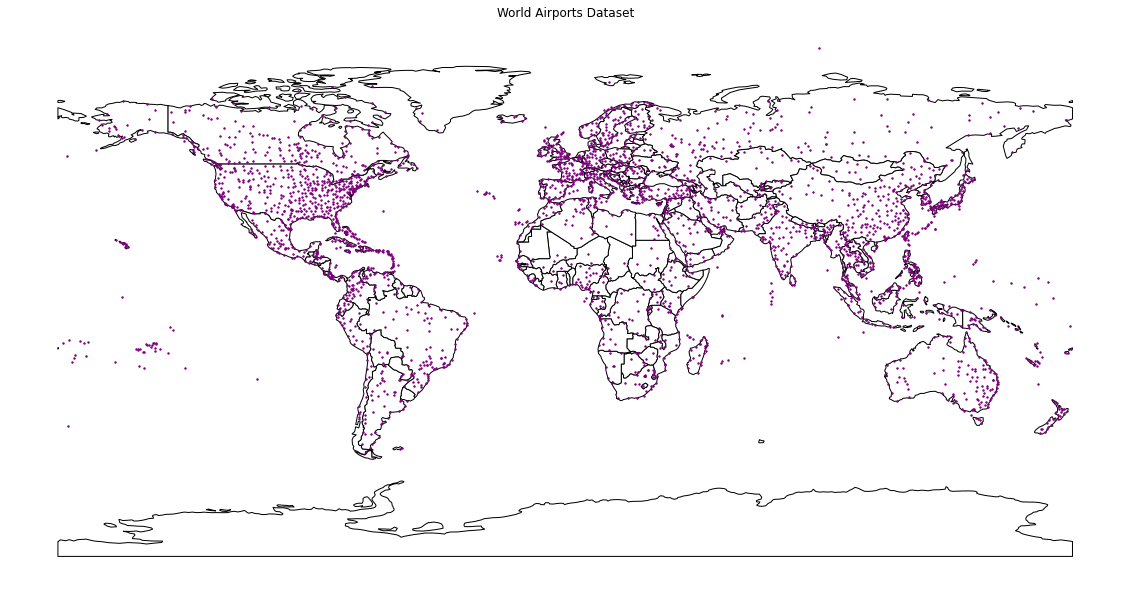

In [33]:
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(20, 12))
# Display tile map
alalm.plot(ax=ax, edgecolor='black', color='white')
# Display airports on top
ax.scatter(world_airport.longitude_deg, world_airport.latitude_deg, c='purple', s=2)
# Remove axis
ax.set_axis_off()
# Add title
ax.set_title('World Airports Dataset')
# Display
plt.show()

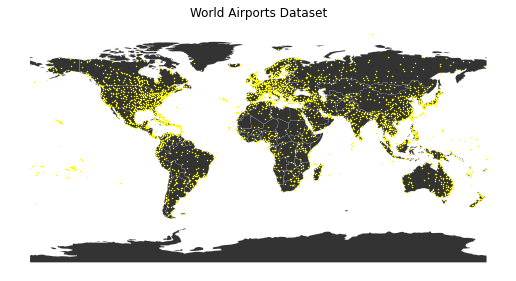

In [35]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Add tile map
# Display country layer
alalm.plot(ax=ax, linewidth=0.1, \
          edgecolor='0.8', color='0.2')
# Display airport locations
ax.scatter(world_airport.longitude_deg, world_airport.latitude_deg, c='yellow', s=2, linewidth=0.)
# Remove axis
ax.set_axis_off()
# Add title
ax.set_title('World Airports Dataset')
# Display
plt.show()

Obtain country counts of airports is to link each airport with the country where it is located.

In [37]:
# check if the first dot on the airports table is inside the first polygon in the countries table:
# Single out point
pt = world_airport.iloc[0]['geometry']
# Single out polygon
poly = alalm.iloc[0]['geometry']
# Check whether `poly` contains `pt`
poly.contains(pt)

False

So, the first airport in the list is not in the first country of the list.

To find which country every airport is in easily, we need to sift through all possible combinations to see if any of them gives us a match. Once we find it for a given airport, we need to record that and move on, no need to keep checking

In [40]:

# Set up an empty dictionary to populate it with the matches
airport2country = {aID: None for aID in world_airport.index}

In [42]:
len(airport2country)

3187

In [46]:
%%time
# Loop over every airport
for aID, row_a in world_airport.iterrows():
    # Single out location of the airport for convenience
    pt = row_a['geometry']
    # Loop over every country
    for cID, row_p in alalm.iterrows():
        # Single out country polygon for convenience
        poly = row_p['geometry']
        # Single out country name for convenience
        cty_nm = row_p['name']
        # Check if the country contains the airport
        if poly.contains(pt):
            # If so, store in the dictionary
            airport2country[aID] = cty_nm
            # Move on to the next airport, skipping remaining 
            # countries (an airport cannot be in two countries 
            # at the same time)
            break
airport2country = pd.Series(airport2country)

<IPython.core.display.Javascript object>

Wall time: 1min 4s


In [47]:
airport2country.head()

0         Solomon Is.
1                None
2                None
3    Papua New Guinea
4                None
dtype: object

In [50]:
len(airport2country)

3187

In [51]:
airport2country.describe()

count                         2711
unique                         171
top       United States of America
freq                           406
dtype: object

In [54]:
pd.DataFrame({'Airport Name': world_airport['name'], 'Country': airport2country}).head(10)

<IPython.core.display.Javascript object>

Airport Name           Country
0  Honiara International Airport       Solomon Is.
1                  Munda Airport              None
2    Nauru International Airport              None
3                   Buka Airport  Papua New Guinea
4                   Daru Airport              None
5                 Goroka Airport  Papua New Guinea
6                 Gurney Airport  Papua New Guinea
7                  Kimbe Airport              None
8                 Kerema Airport  Papua New Guinea
9                Kavieng Airport              None

In [55]:
airport_world = pd.DataFrame({'Airport Name': world_airport['name'], 'Country': airport2country})

<IPython.core.display.Javascript object>

In [59]:
airport_world

Airport Name           Country
0     Honiara International Airport       Solomon Is.
1                     Munda Airport              None
2       Nauru International Airport              None
3                      Buka Airport  Papua New Guinea
4                      Daru Airport              None
...                             ...               ...
3182                Jinzhou Airport             China
3183                  Lindu Airport             China
3184                Gu-Lian Airport             China
3185      Tonghua Sanyuanpu Airport             China
3186          Yingkou Lanqi Airport             China

[3187 rows x 2 columns]

In [60]:
# Spatial join
%time air_w_cty = gpd.sjoin(world_airport, alalm)
air_w_cty.head()

Wall time: 357 ms


OBJECTID_1    id ident            type                      name_left  \
0           1   3.0  AGGH  medium_airport  Honiara International Airport   
3           4  53.0  AYBK  medium_airport                   Buka Airport   
5           6  56.0  AYGA  medium_airport                 Goroka Airport   
6           7  57.0  AYGN  medium_airport                 Gurney Airport   
8           9  60.0  AYKM  medium_airport                 Kerema Airport   

   latitude_deg  longitude_deg  elevation_ft continent_left iso_country  ...  \
0      -9.42800     160.054993          28.0             OC          SB  ...   
3      -5.42232     154.673004          11.0             OC          PG  ...   
5      -6.08169     145.391998        5282.0             OC          PG  ...   
6     -10.31150     150.334000          88.0             OC          PG  ...   
8      -7.96361     145.770996          10.0             OC          PG  ...   

  type_1   description frequency_mhz                               geometry  \
0   AFIS          INFO         118.1   POINT Z (160.05499 -9.42800 0.00000)   
3    RDO       LAE RDO         127.1   POINT Z (154.67300 -5.42232 0.00000)   
5    TWR           TWR         118.7   POINT Z (145.39200 -6.08169 0.00000)   
6    FSS  MORESBY CNTR         124.1  POINT Z (150.33400 -10.31150 0.00000)   
8    FSS       MORESBY         120.9   POINT Z (145.77100 -7.96361 0.00000)   

  index_right  pop_est continent_right        name_right iso_a3  gdp_md_est  
0         135   647581         Oceania       Solomon Is.    SLB      1198.0  
3           7  6909701         Oceania  Papua New Guinea    PNG     28020.0  
5           7  6909701         Oceania  Papua New Guinea    PNG     28020.0  
6           7  6909701         Oceania  Papua New Guinea    PNG     28020.0  
8           7  6909701         Oceania  Papua New Guinea    PNG     28020.0  

[5 rows x 50 columns]

In [61]:
len(air_w_cty)

2711

In [69]:
air_w_cty.columns

Index(['OBJECTID_1', 'id', 'ident', 'type', 'name_left', 'latitude_deg',
       'longitude_deg', 'elevation_ft', 'continent_left', 'iso_country',
       'iso_region', 'municipality', 'scheduled_service', 'gps_code',
       'iata_code', 'local_code', 'home_link', 'wikipedia_link', 'keywords',
       'id_1', 'airport_ref', 'airport_ident', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_latitude_deg',
       'le_longitude_deg', 'le_elevation_ft', 'le_heading_degT',
       'le_displaced_threshold_ft', 'he_ident', 'he_latitude_deg',
       'he_longitude_deg', 'he_elevation_ft', 'he_heading_degT',
       'he_displaced_threshold_ft', 'ObjectID', 'type_1', 'description',
       'frequency_mhz', 'geometry', 'index_right', 'pop_est',
       'continent_right', 'name_right', 'iso_a3', 'gdp_md_est'],
      dtype='object')

In [62]:
air_w_cty.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2711 entries, 0 to 3096
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   OBJECTID_1                 2711 non-null   int64   
 1   id                         2711 non-null   float64 
 2   ident                      2711 non-null   object  
 3   type                       2711 non-null   object  
 4   name_left                  2711 non-null   object  
 5   latitude_deg               2711 non-null   float64 
 6   longitude_deg              2711 non-null   float64 
 7   elevation_ft               2671 non-null   float64 
 8   continent_left             2711 non-null   object  
 9   iso_country                2711 non-null   object  
 10  iso_region                 2711 non-null   object  
 11  municipality               2711 non-null   object  
 12  scheduled_service          2711 non-null   object  
 13  gps_code                 

<AxesSubplot:>

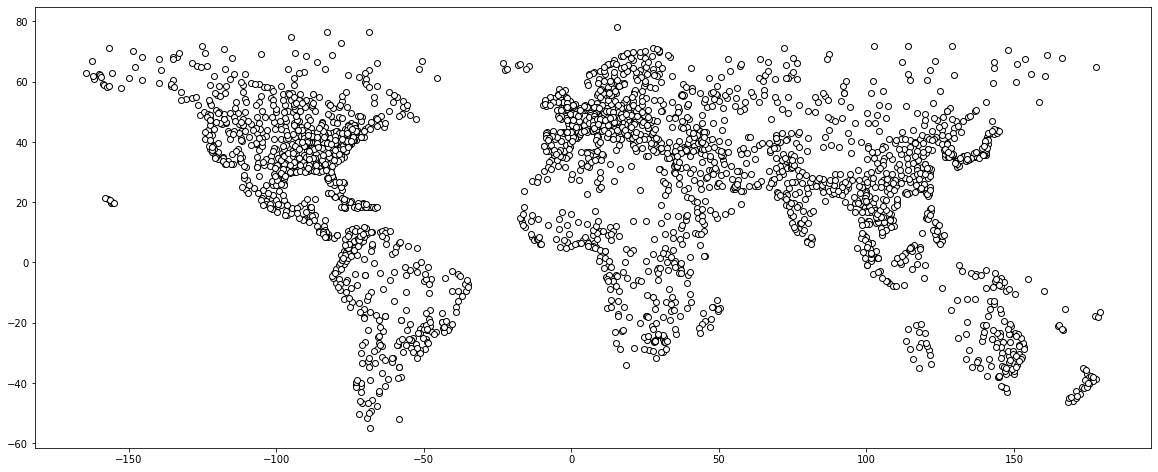

In [64]:
air_w_cty.plot(figsize=(20, 12), color='w', edgecolor='black')

Let us quickly compare whether the names match up with our own:

In [78]:
# Display only top six records of airport and country name
# Note that the order of the `sjoin`ed table is not the same
# as ours but it can easily be rearranged using original indices
country_and_airport = air_w_cty[['name_left','name_right', 'longitude_deg', 'latitude_deg', 'geometry']]

In [79]:
country_and_airport.head()

name_left        name_right  longitude_deg  \
0  Honiara International Airport       Solomon Is.     160.054993   
3                   Buka Airport  Papua New Guinea     154.673004   
5                 Goroka Airport  Papua New Guinea     145.391998   
6                 Gurney Airport  Papua New Guinea     150.334000   
8                 Kerema Airport  Papua New Guinea     145.770996   

   latitude_deg                               geometry  
0      -9.42800   POINT Z (160.05499 -9.42800 0.00000)  
3      -5.42232   POINT Z (154.67300 -5.42232 0.00000)  
5      -6.08169   POINT Z (145.39200 -6.08169 0.00000)  
6     -10.31150  POINT Z (150.33400 -10.31150 0.00000)  
8      -7.96361   POINT Z (145.77100 -7.96361 0.00000)

In [81]:
country_and_airport.to_file('D:\Research\PROJECT\pyexeriences\Geospatial experiences\Book Geographic data with python\output\country_airport_world')

### Explore which countries have the most airports through a simple choropleth.

In [82]:
# Rename 'name_left, name_right' to 'airport_name' and 'country'
country_and_airport.rename(columns = {'name_left':'airport_name', 'name_right':'country'}, inplace = True)

d:\programm files\python 3 8 6\lib\site-packages\pandas\core\frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [83]:
country_and_airport.head()

airport_name           country  longitude_deg  \
0  Honiara International Airport       Solomon Is.     160.054993   
3                   Buka Airport  Papua New Guinea     154.673004   
5                 Goroka Airport  Papua New Guinea     145.391998   
6                 Gurney Airport  Papua New Guinea     150.334000   
8                 Kerema Airport  Papua New Guinea     145.770996   

   latitude_deg                               geometry  
0      -9.42800   POINT Z (160.05499 -9.42800 0.00000)  
3      -5.42232   POINT Z (154.67300 -5.42232 0.00000)  
5      -6.08169   POINT Z (145.39200 -6.08169 0.00000)  
6     -10.31150  POINT Z (150.33400 -10.31150 0.00000)  
8      -7.96361   POINT Z (145.77100 -7.96361 0.00000)

In [84]:
country_and_airport.columns

Index(['airport_name', 'country', 'longitude_deg', 'latitude_deg', 'geometry'], dtype='object')

In [90]:
# Group airports by country and count by group
country_counts = country_and_airport.groupby('country').size()

In [91]:
country_counts.head()

country
Afghanistan     4
Albania         1
Algeria        28
Angola         13
Argentina      43
dtype: int64

In [94]:
country_counts = country_counts.sort_values(ascending=False)

In [104]:
# The first 10 countries in the world with max airports numbers
country_counts.head(10)

country
United States of America    406
Canada                      189
China                       173
Russia                      138
Australia                   103
Brazil                       86
India                        73
Mexico                       60
France                       59
Japan                        51
dtype: int64

In [101]:
# The less 
country_counts.tail(10)

country
Guinea                  1
El Salvador             1
Moldova                 1
Mauritania              1
Guinea-Bissau           1
Luxembourg              1
Central African Rep.    1
Burundi                 1
Lesotho                 1
Lebanon                 1
dtype: int64

<AxesSubplot:xlabel='country'>

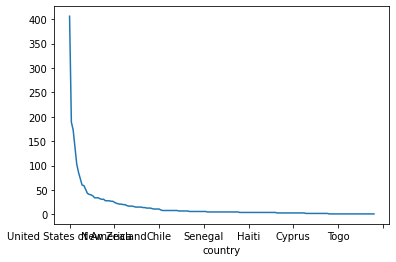

In [105]:
country_counts.plot()

Let's convert our country_count to a geodataframe, just to take a look

In [114]:
gpd.GeoDataFrame(country_counts)

0
country                      
United States of America  406
Canada                    189
China                     173
Russia                    138
Australia                 103
...                       ...
Luxembourg                  1
Central African Rep.        1
Burundi                     1
Lesotho                     1
Lebanon                     1

[171 rows x 1 columns]

In [115]:
country_and_airport[''] = air_w_cty['continent_left']

d:\programm files\python 3 8 6\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [116]:
country_and_airport.head()

airport_name           country  longitude_deg  \
0  Honiara International Airport       Solomon Is.     160.054993   
3                   Buka Airport  Papua New Guinea     154.673004   
5                 Goroka Airport  Papua New Guinea     145.391998   
6                 Gurney Airport  Papua New Guinea     150.334000   
8                 Kerema Airport  Papua New Guinea     145.770996   

   latitude_deg                               geometry      
0      -9.42800   POINT Z (160.05499 -9.42800 0.00000)  OC  
3      -5.42232   POINT Z (154.67300 -5.42232 0.00000)  OC  
5      -6.08169   POINT Z (145.39200 -6.08169 0.00000)  OC  
6     -10.31150  POINT Z (150.33400 -10.31150 0.00000)  OC  
8      -7.96361   POINT Z (145.77100 -7.96361 0.00000)  OC

In [117]:
country_and_airport.columns

Index(['airport_name', 'country', 'longitude_deg', 'latitude_deg', 'geometry',
       ''],
      dtype='object')

In [120]:
country_and_airport.rename(columns={'': 'continent'}, inplace=True)

d:\programm files\python 3 8 6\lib\site-packages\pandas\core\frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [121]:
country_and_airport.columns

Index(['airport_name', 'country', 'longitude_deg', 'latitude_deg', 'geometry',
       'continent'],
      dtype='object')

In [127]:
country_and_airport['continent'].nunique()

6

In [129]:
# Number of airport in every continent
continent_counts = country_and_airport.groupby('continent').size()

In [132]:
continent_counts.sort_values(ascending=False)

continent
AS    772
NA    733
EU    518
AF    286
SA    250
OC    152
dtype: int64

<AxesSubplot:xlabel='continent'>

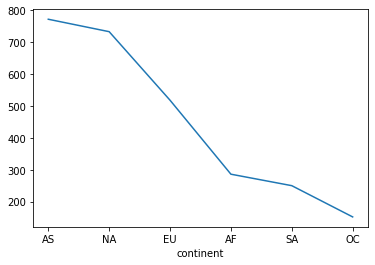

In [134]:
continent_counts.sort_values(ascending=False).plot()